In [4]:
% matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
from IPython.display import Image


# Add modules path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from Translator import Translator
from DecisionTree import DecisionTree
import preprocessor as pp


# Add modules path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Define language and translator functions
language = "es"
translator = Translator(language)
to_lang = translator.translate_to_language
to_col = translator.translate_to_column

# Load data
raw_data = pd.read_csv("sample.txt", header=0, skiprows=1, delimiter="\t", index_col=0, usecols=list(range(0, 9)),
                       parse_dates=to_lang(["Datetime"]), decimal=",",
                       date_parser=lambda x: pd.to_datetime(x, format="%Y/%m/%d %H:%M"))
# Translate column names
raw_data.columns = (to_col(raw_data.columns))

# Divide in blocks, extend dataset and clean data
block_data = pp.define_blocks(raw_data)
cleaned_block_data = pp.clean_processed_data(block_data)
extended_data = pp.extend_data(cleaned_block_data)
cleaned_extended_data = pp.clean_extended_data(extended_data)

# Add data corresponding to previous blocks

## Add data corresponding to 1 block before

In [5]:
offset = 1
counter = 0
previous = np.nan
cleaned_extended_data.loc[:, "Glucose_Mean_Prev_Block"] = np.nan
cleaned_extended_data.loc[:, "Glucose_Std_Prev_Block"] = np.nan
cleaned_extended_data.loc[:, "Glucose_Min_Prev_Block"] = np.nan
cleaned_extended_data.loc[:, "Glucose_Max_Prev_Block"] = np.nan
cleaned_extended_data.loc[:, "Rapid_Insulin_Prev_Block"] = np.nan
cleaned_extended_data.loc[:, "Carbo_Prev_Block"] = np.nan

for block in cleaned_extended_data[["Day_Block", "Block", "Glucose_Mean_Block", "Glucose_Std_Block",
                                    "Glucose_Min_Block", "Glucose_Max_Block", "Rapid_Insulin_Block",
                                    "Carbo_Block"]].drop_duplicates().itertuples():
    if counter >= offset:
        mask = (cleaned_extended_data["Day_Block"] == block[1]) & (cleaned_extended_data["Block"] == block[2])
        cleaned_extended_data.loc[mask, "Glucose_Mean_Prev_Block"] = previous[3]
        cleaned_extended_data.loc[mask, "Glucose_Std_Prev_Block"] = previous[4]
        cleaned_extended_data.loc[mask, "Glucose_Min_Prev_Block"] = previous[5]
        cleaned_extended_data.loc[mask, "Glucose_Max_Prev_Block"] = previous[6]
        cleaned_extended_data.loc[mask, "Rapid_Insulin_Prev_Block"] = previous[7]
        cleaned_extended_data.loc[mask, "Carbo_Prev_Block"] = previous[8]
        
    previous = block
    counter += 1

In [6]:
cleaned_extended_data[["Datetime", "Block", "Day_Block", "Glucose_Mean_Block", "Glucose_Std_Block",
                       "Glucose_Mean_Prev_Block", "Glucose_Std_Prev_Block"]].iloc[[9,10, 21, 22, 2152, 2153]]

,Datetime,Block,Day_Block,Glucose_Mean_Block,Glucose_Std_Block,Glucose_Mean_Prev_Block,Glucose_Std_Prev_Block
9,2016-03-31 19:44:00,1,2016-03-31,90.250000,21.324477,NaN,NaN
10,2016-03-31 19:44:00,2,2016-03-31,105.000000,13.128733,90.250000,21.324477
21,2016-03-31 21:14:00,1,2016-03-31,90.250000,21.324477,NaN,NaN
22,2016-03-31 21:14:00,2,2016-03-31,105.000000,13.128733,90.250000,21.324477
2152,2016-04-14 01:00:00,7,2016-04-13,140.421053,57.604317,80.482759,19.419469
2153,2016-04-14 01:15:00,0,2016-04-14,238.600000,19.107452,140.421053,57.604317


In [7]:
cleaned_extended_data[["Datetime", "Block", "Day_Block", "Glucose_Min_Block", "Glucose_Max_Block",
                       "Glucose_Min_Prev_Block", "Glucose_Max_Prev_Block"]].iloc[[9,10, 21, 22, 2152, 2153]]

,Datetime,Block,Day_Block,Glucose_Min_Block,Glucose_Max_Block,Glucose_Min_Prev_Block,Glucose_Max_Prev_Block
9,2016-03-31 19:44:00,1,2016-03-31,55.0,119.0,NaN,NaN
10,2016-03-31 19:44:00,2,2016-03-31,82.0,123.0,55.0,119.0
21,2016-03-31 21:14:00,1,2016-03-31,55.0,119.0,NaN,NaN
22,2016-03-31 21:14:00,2,2016-03-31,82.0,123.0,55.0,119.0
2152,2016-04-14 01:00:00,7,2016-04-13,51.0,216.0,51.0,115.0
2153,2016-04-14 01:15:00,0,2016-04-14,214.0,271.0,51.0,216.0


In [8]:
cleaned_extended_data[["Datetime", "Block", "Day_Block", "Rapid_Insulin_Block", "Carbo_Block",
                       "Rapid_Insulin_Prev_Block", "Carbo_Prev_Block"]].iloc[[9,10, 21, 22, 2152, 2153]]

,Datetime,Block,Day_Block,Rapid_Insulin_Block,Carbo_Block,Rapid_Insulin_Prev_Block,Carbo_Prev_Block
9,2016-03-31 19:44:00,1,2016-03-31,1.0,1.5,NaN,NaN
10,2016-03-31 19:44:00,2,2016-03-31,1.0,1.0,1.0,1.5
21,2016-03-31 21:14:00,1,2016-03-31,1.0,1.5,NaN,NaN
22,2016-03-31 21:14:00,2,2016-03-31,1.0,1.0,1.0,1.5
2152,2016-04-14 01:00:00,7,2016-04-13,1.0,1.0,0.0,1.0
2153,2016-04-14 01:15:00,0,2016-04-14,0.0,0.0,1.0,1.0


## Delete null rows correspoding to first block of the dataset

In [9]:
cleaned_extended_data.dropna(inplace='True', subset=["Glucose_Mean_Prev_Block", "Glucose_Std_Prev_Block",
                                    "Glucose_Min_Prev_Block", "Glucose_Max_Prev_Block", "Rapid_Insulin_Prev_Block",
                                    "Carbo_Prev_Block"])

## Drop columns corresponding to current block


In [10]:
cleaned_extended_data.drop(["Glucose_Mean_Block", "Glucose_Std_Block",
                                    "Glucose_Min_Block", "Glucose_Max_Block", "Rapid_Insulin_Block",
                                    "Carbo_Block"], inplace=True, axis=1)

In [11]:
list(cleaned_extended_data.columns.values)

['Datetime',
 'Glucose_Auto',
 'Hour',
 'Block',
 'Day_Block',
 'Last_Meal',
 'Overlapped_Block',
 'Glucose_Mean_Day',
 'Glucose_Std_Day',
 'Glucose_Min_Day',
 'Glucose_Max_Day',
 'MAGE',
 'Weekday',
 'Minutes_Last_Meal',
 'Last_Meal_Hour',
 'Diagnosis',
 'Glucose_Mean_Prev_Block',
 'Glucose_Std_Prev_Block',
 'Glucose_Min_Prev_Block',
 'Glucose_Max_Prev_Block',
 'Rapid_Insulin_Prev_Block',
 'Carbo_Prev_Block']

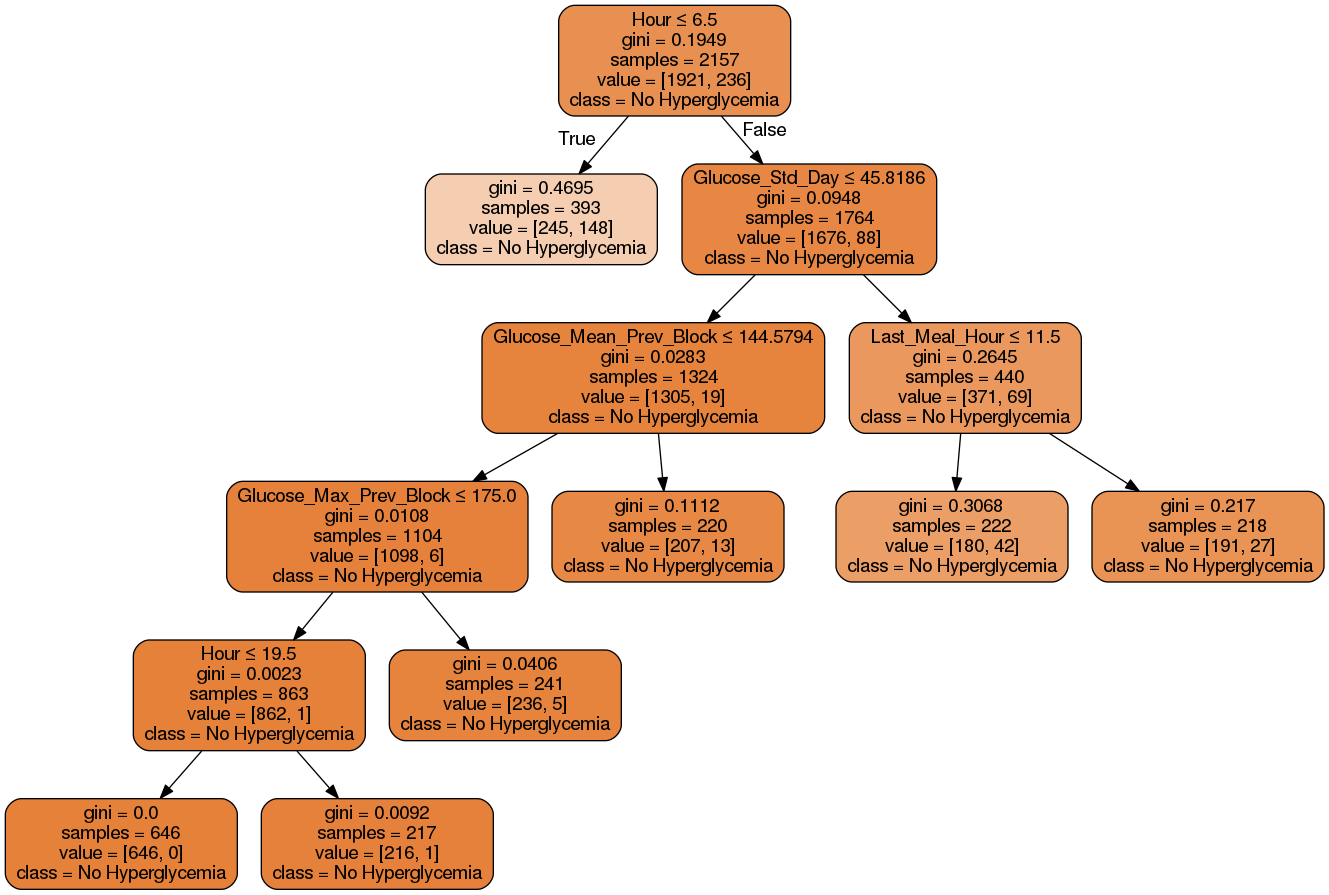

In [12]:
# Create decision trees
[data, labels] = pp.prepare_to_decision_trees (cleaned_extended_data)
hyper_dt = DecisionTree(data, labels["Hyperglycemia_Diagnosis"])
hypo_dt = DecisionTree(data, labels["Hypoglycemia_Diagnosis"])
Image(hyper_dt.graph.create_png())

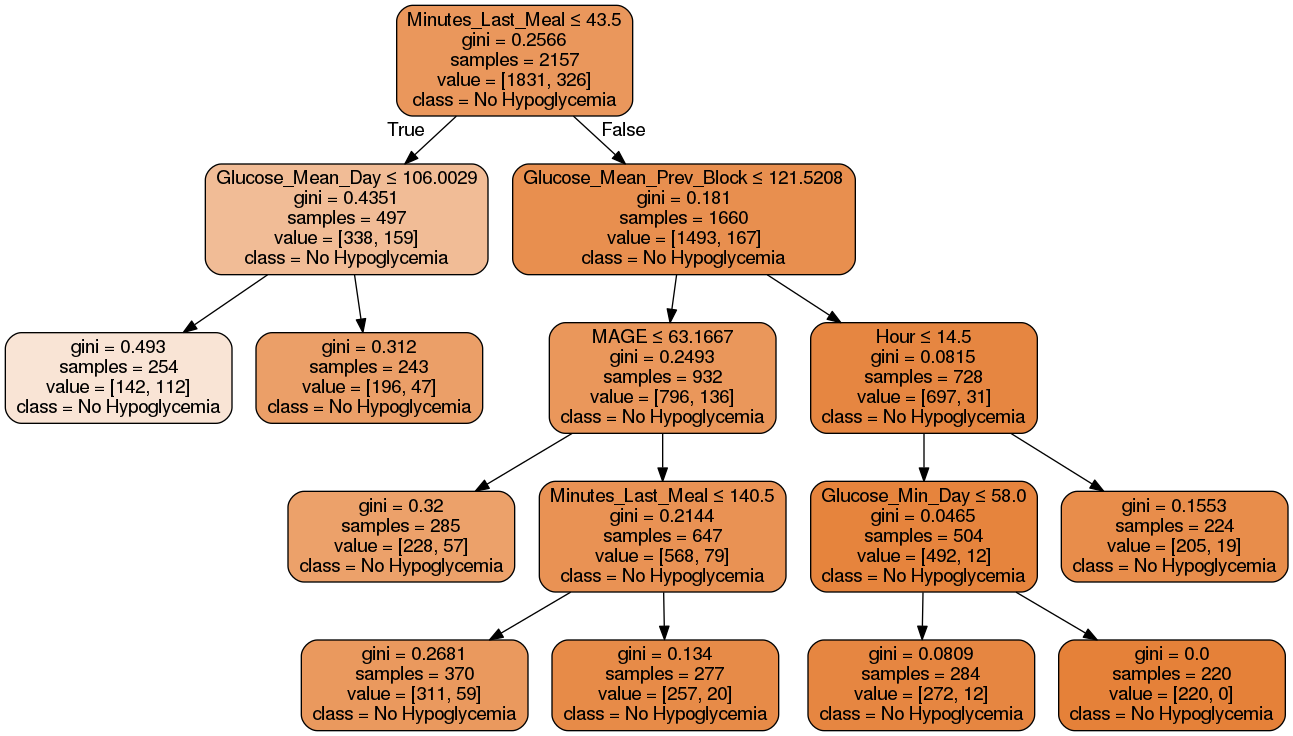

In [13]:
Image(hypo_dt.graph.create_png())

In [14]:
print("Hyperglycemia feature importance")
for idx, score in enumerate(hyper_dt.feature_importances):
    print("{:s} : {:.4f} ".format(data.columns[idx], score))

Hyperglycemia feature importance
Hour : 0.8153 
Block : 0.0000 
Overlapped_Block : 0.0000 
Glucose_Mean_Day : 0.0000 
Glucose_Std_Day : 0.1593 
Glucose_Min_Day : 0.0000 
Glucose_Max_Day : 0.0000 
MAGE : 0.0000 
Weekday : 0.0000 
Minutes_Last_Meal : 0.0000 
Last_Meal_Hour : 0.0112 
Glucose_Mean_Prev_Block : 0.0126 
Glucose_Std_Prev_Block : 0.0000 
Glucose_Min_Prev_Block : 0.0000 
Glucose_Max_Prev_Block : 0.0017 
Rapid_Insulin_Prev_Block : 0.0000 
Carbo_Prev_Block : 0.0000 


In [14]:
print("Hypoglycemia feature importance")
for idx, score in enumerate(hypo_dt.feature_importances):
    print("{:s} : {:.4f} ".format(data.columns[idx], score))

Hypoglycemia feature importance
Hour : 0.0172 
Block : 0.0000 
Overlapped_Block : 0.0000 
Glucose_Mean_Day : 0.2266 
Glucose_Std_Day : 0.0000 
Glucose_Min_Day : 0.0066 
Glucose_Max_Day : 0.0000 
MAGE : 0.0358 
Weekday : 0.0000 
Minutes_Last_Meal : 0.5838 
Last_Meal_Hour : 0.0000 
Glucose_Mean_Prev_Block : 0.1300 
Glucose_Std_Prev_Block : 0.0000 
Glucose_Min_Prev_Block : 0.0000 
Glucose_Max_Prev_Block : 0.0000 
Rapid_Insulin_Prev_Block : 0.0000 
Carbo_Prev_Block : 0.0000 
